# 데이터 집계와 시각화

### 주요 내용

1. 건수, 합계 평균 등 집계값 계산
2. 히스토그램, 상자그림, 막대그래프, 파이차트 등 그래프 작성

<br>

### 목표
1. 집계값을 계산할 수 있다.
2. 적절한 그래프를 작성하고 올바르게 해석할 수 있다.


<br>
<hr>
<br>

## 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # 그래프 작성
import matplotlib.pyplot as plt # 그래프 작성

<br>

## 예제 및 실습 데이터 불러오기

In [4]:
# 데이터 불러오기1
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# 데이터 불러오기2
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<br>

## 1. 범주형 변수의 요약과 시각화  

In [6]:
# 수준(levels) 및 개수 확인
# unique() 함수는 원래 list에서 중복을 제거한 목록을 표시하는 기능이지만, 범주형 변수의 수준(level)을 목록을 확인하는데 활용이 가능함.
df_ins['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [7]:
df_ins['smoker'].nunique()

2

<br>

### 1.1. 수준별 관측치 수 계산

In [8]:
# 수준별 관측치 수 세기
df_ins['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64


### 1.2. 수준별 관측치 수 막대그래프


<Axes: xlabel='smoker', ylabel='count'>

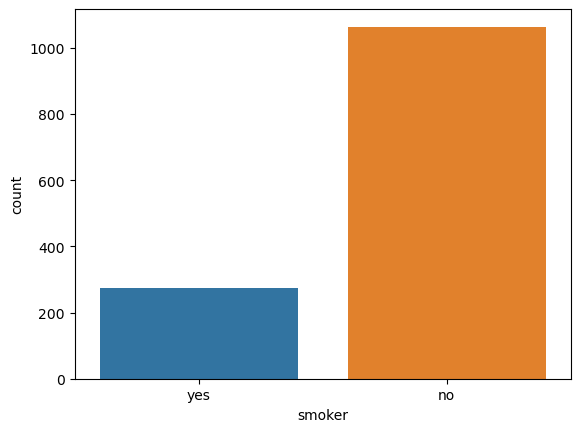

In [9]:
# seaborn을 활용한 막대그래프
sns.countplot(data=df_ins,
              x='smoker')


### 1.3 수준별 관측 상대빈도 파이차트


In [10]:
smoker_fraction = df_ins['smoker'].value_counts()/df_ins['smoker'].count() #파이의 상대적인 크기 구하기 x/sum(x)
smoker_fraction

smoker
no     0.795217
yes    0.204783
Name: count, dtype: float64

In [11]:
answer = smoker_fraction.index
answer

Index(['no', 'yes'], dtype='object', name='smoker')

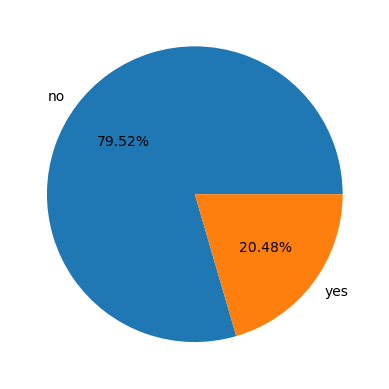

In [12]:
plt.pie(x= smoker_fraction,
       labels = answer,
       autopct = '%.2f%%') #파이에 표시될 숫자의 형식 지정, 소숫점 두자리까지표시
plt.show()


### 1.4 Category 타입으로 변경하기 및 수준 순서 지정하기


In [ ]:
# astype() 명령어로 데이터 타입 변경 가능
df_ins['smoker'] = df_ins['smoker'].astype('category')
df_ins['smoker']

In [ ]:
# 범주형 변수 수준의 순서를 다시 지정하여 할당
df_ins['smoker'] = df_ins['smoker'].cat.reorder_categories(["no", "yes"], ordered = True)

In [ ]:
# 지정한 순서대로 X축에 정렬된 그래프 확인
sns.countplot(data=df_ins,
              x='smoker')


<br>

#### [실습]

1. 데이터 df_sp에서 'parental level of education'의 수준 목록 확인하기
2. 데이터 df_sp에서 'parental level of education'의 수준별 관측치 수 계산하기
3. 데이터 df_sp에서 'parental level of education'의 수준별 관측치 수 막대그래프 그리기
4. 데이터 df_sp에서 'parental level of education'의 수준별 상대 빈도로 파이차트 그리기. (각 파이에 표시될 숫자가 소수점 `첫자리`까지 표시되도록)

In [25]:
# 1.데이터 df_sp에서 'parental level of education'의 수준 목록 확인하기
df_sp['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
# 2. 데이터 df_sp에서 'parental level of education'의 수준별 관측치 수 계산하기
df_sp['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

<Axes: xlabel='parental level of education', ylabel='count'>

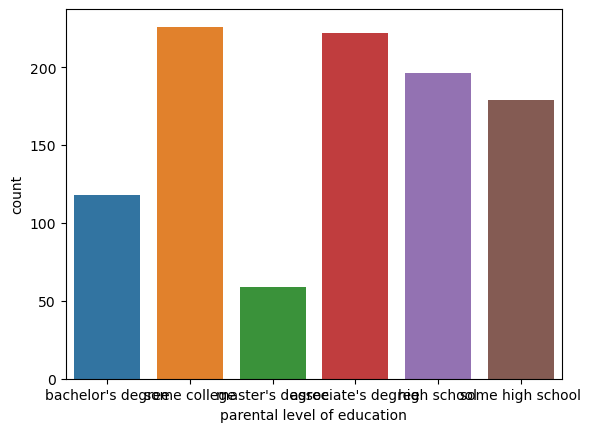

In [15]:
# 3. 데이터 df_sp에서 'parental level of education'의 수준별 관측치 수 막대그래프 그리기
# seaborn을 활용한 막대그래프
sns.countplot(data=df_sp,
              x='parental level of education')

In [19]:
# 4. 데이터 df_sp에서 'parental level of education'의 수준별 상대 빈도로 파이차트 그리기.
# (각 파이에 표시될 숫자가 소수점 `첫자리`까지 표시되도록)
edu_fraction = df_sp['parental level of education'].value_counts()/df_sp['parental level of education'].count() #파이의 상대적인 크기 구하기 x/sum(x)
edu_fraction

parental level of education
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: count, dtype: float64

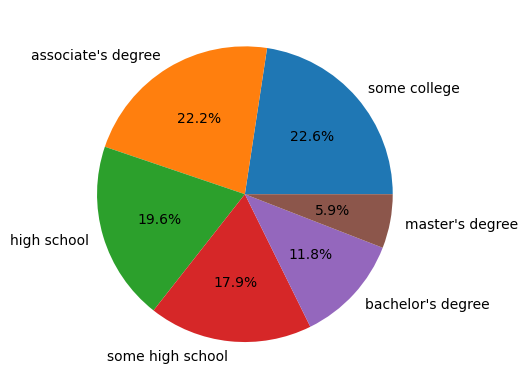

In [24]:
answer2 = edu_fraction.index
answer2

plt.pie(x= edu_fraction,
       labels = answer2,
       autopct = '%.1f%%') #파이에 표시될 숫자의 형식 지정, 소숫점 두자리까지표시
plt.show()

parental level of education
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: count, dtype: float64

<br>
<br>
<br>

## 2. 수치형 변수의 집계값과 분포 그래프

하나의 수치형 변수로 사분위수, 합계, 평균과 같은 집계값을 계산할 수 있고 히스토그램이나 상자그림으로 분포를 확인




<br>


### 2.1. 순서통계량, 분위수, 그리고 상자그림

`quantile()`을 활용해서 분위수를 계산 가능  

사분위수(quartile)를 계산하고 상자그림(boxplot)으로 분포 확인
* 최솟값(minimum, 0%)
* Q1(1st Quartile, 25%)
* 중앙값(median, 50%)
* Q3(3rd Quartile, 75%)
* 최댓값(maximum, 100%)

In [32]:
# 대표적인 3가지 순서통계량
df_ins['charges'].min()
df_ins['charges'].median()
df_ins['charges'].max()

63770.42801

In [33]:
# 분위수 계산
df_ins['charges'].quantile(0.1) # 10% 분위수를 출력

2346.5336150000003

In [34]:
# charges의 사분위수 계산
df_ins['charges'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])
    ## quantile( ) : 계산할 분위(1.0이 최댓값) 를 리스트로 묶기

0.00     1121.873900
0.25     4740.287150
0.50     9382.033000
0.75    16639.912515
1.00    63770.428010
Name: charges, dtype: float64

In [35]:
# age의 사분위수 계산
df_ins['age'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])

0.00    18.0
0.25    27.0
0.50    39.0
0.75    51.0
1.00    64.0
Name: age, dtype: float64

<Axes: ylabel='age'>

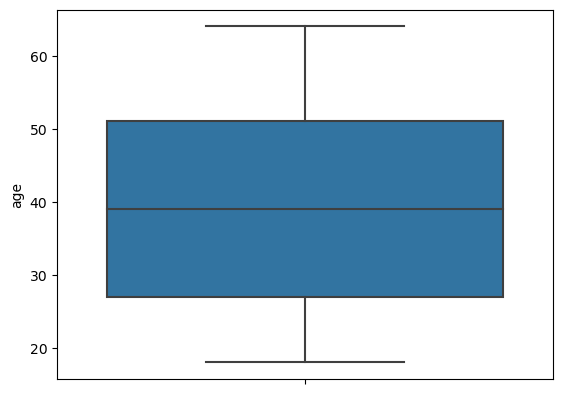

In [30]:
# boxplot()을 활용한 age의 상자그림
sns.boxplot(data=df_ins,
            y='age')

<Axes: ylabel='charges'>

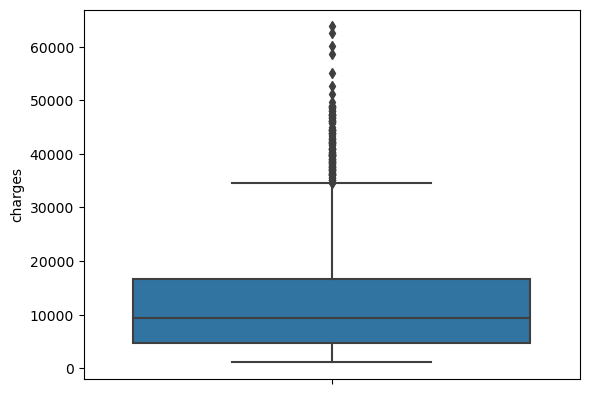

In [36]:
# boxplot()을 활용한 charges의 상자그림과 이상치
sns.boxplot(data=df_ins,
            y='charges')

<br>


#### [실습]

1. df_sp에서 'reading score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
2. df_sp에서 'reading score'의 상자그림 그리기
3. df_sp에서 'writing score'로 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
4. df_sp에서 'writing score'의 상자그림 그리기

In [39]:
# 1.df_sp에서 'reading score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
df_sp['reading score'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])

0.00     17.0
0.25     59.0
0.50     70.0
0.75     79.0
1.00    100.0
Name: reading score, dtype: float64

<Axes: ylabel='reading score'>

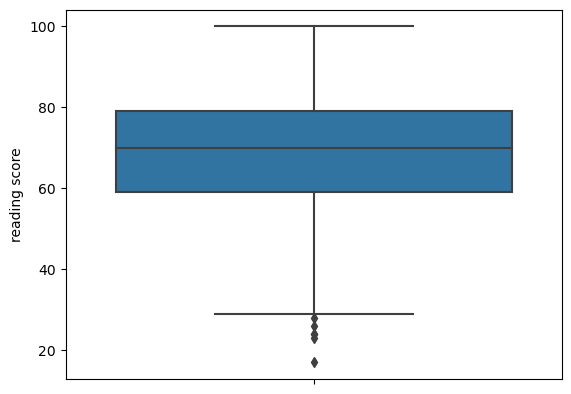

In [40]:
# 2. df_sp에서 'reading score'의 상자그림 그리기
sns.boxplot(data=df_sp,
            y='reading score')

In [44]:
# 3. df_sp에서 'writing score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
df_sp['writing score'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])
IQR=df_sp['writing score'].quantile(0.75)-df_sp['writing score'].quantile(0.25)
IQR

21.25

<Axes: ylabel='writing score'>

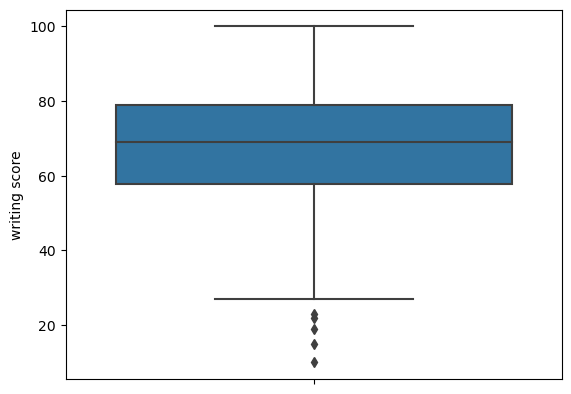

In [42]:
# 4. df_sp에서 'writing score'의 상자그림 그리기
sns.boxplot(data=df_sp,
            y='writing score')

<br>

### 2.2. 합계를 활용한 수치형 변수의 집계값 계산

수치형 변수를 선택한 다음 sum( ), mean( ) 같은 메서드를 활용해서 집계값을 계산

In [55]:
# 관심 변수 선택
df_ins['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [56]:
# 수치형 변수의 집계값 계산
    # mean( ) : 수치형 Series의 메서드
df_ins['charges'].mean()

13270.422265141257

In [57]:
df_ins['charges'].sum()

17755824.990759

In [58]:
# 분산과 표준편차계산
# df_ins['charges'].var()
df_ins['charges'].std()

12110.011236693994

In [59]:
# 관측치 수 계산하기
df_ins['charges'].count()

1338

In [60]:
# describe() 함수 사용해서 데이터프레임의 여러 변수들에 대한 기술통계량 구하기
df_ins.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [61]:
df_ins.describe()  # include에 아무것도 지정하지 않으면 수치형 변수만 대상으로 기술통계량 구하기

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
df_ins.describe().index, df_ins.describe().columns

(Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object'),
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

#### 2.2.1. numpy를 활용한 집계값 계산

In [45]:
np.sum(df_ins['charges'])

17755824.990759

In [46]:
np.mean(df_ins['charges'])

13270.422265141257

In [47]:
np.std(df_ins['charges'], ddof=1)

12110.011236693994

<br>

### 2.3. 히스토그램 그리기

하나의 수치형변수의 분포를 파악하기 위해서 히스토그램 작성


<Axes: xlabel='charges', ylabel='Count'>

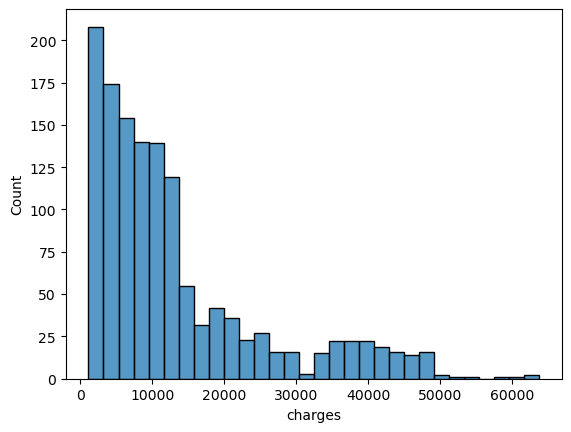

In [48]:
# histplot()을 활용한 히스토그램
sns.histplot(data=df_ins,
             x='charges')

<br>

#### [실습] 한 수치형 변수에 대한 요약과 시각화

1. df_sp에서 'math score'의 평균 계산하기
2. df_sp에서 'math score'의 히스토그램 그려기
3. df_sp에서 수치형 변수들에 대한 기술통계량 구하기
4. df_sp에서 모든 변수들에 대한 기술 통계량 구하기



In [50]:
# 1.df_sp에서 'math score'의 평균 계산하기
df_sp['math score'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64>

<Axes: xlabel='math score', ylabel='Count'>

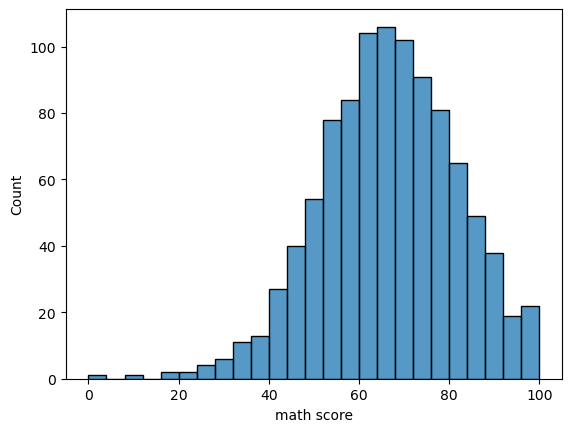

In [51]:
# 2.df_sp에서 'math score'의 히스토그램 그려기
# histplot()을 활용한 히스토그램
sns.histplot(data=df_sp,
             x='math score')

In [54]:
# 3.df_sp에서 수치형 변수들에 대한 기술통계량 구하기
df_sp['math score'].min(), df_sp['math score'].median(), df_sp['math score'].max()

(0, 66.0, 100)

In [64]:
# 4.df_sp에서 모든 변수들에 대한 기술 통계량 구하기
df_sp.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


<br>


### 2.4. 표준점수 (z-score)

`평균`과 `표준편차`를 활용해서 `표준점수(z-score)` 계산 가능  

`DataFrame.assign()` 함수를 사용하여 기존 DataFrame에 추가하여 활용할 수 있음

In [65]:
# df_sp 'math score' 변수에서 평균과 표준편차 구하기
# mean(), std() 함수 복습
df_sp['math score'].mean(), df_sp['math score'].std()

(66.089, 15.163080096009468)

In [66]:
# df_sp 'math score' 변수에서 z-score 계산, z-score = (x-mean)/std
(df_sp['math score']-df_sp['math score'].mean())/df_sp['math score'].std()

0      0.389828
1      0.191979
2      1.576922
3     -1.258913
4      0.653627
         ...   
995    1.445023
996   -0.269668
997   -0.467517
998    0.126030
999    0.719577
Name: math score, Length: 1000, dtype: float64

In [68]:
# DataFrame.assign() 함수를 사용해서 'math score'의 z-score 변수 df_sp에 추가하기
df_sp.assign(z_math_score = (df_sp['math score']-df_sp['math score'].mean())/df_sp['math score'].std())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z_math_score
0,female,group B,bachelor's degree,standard,none,72,72,74,0.389828
1,female,group C,some college,standard,completed,69,90,88,0.191979
2,female,group B,master's degree,standard,none,90,95,93,1.576922
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.258913
4,male,group C,some college,standard,none,76,78,75,0.653627
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1.445023
996,male,group C,high school,free/reduced,none,62,55,55,-0.269668
997,female,group C,high school,free/reduced,completed,59,71,65,-0.467517
998,female,group D,some college,standard,completed,68,78,77,0.126030


In [70]:
# 'math score', 'reading score', 'writing score'의 z-score를 각각 구하고, 이를 새로운 변수로 추가하여 df_sp_2로 할당
df_sp_2 = df_sp.assign(z_math_score = (df_sp['math score']-df_sp['math score'].mean())/df_sp['math score'].std(),
                z_reading_score = (df_sp['reading score']-df_sp['reading score'].mean())/df_sp['reading score'].std(),
                z_writing_score = (df_sp['writing score']-df_sp['writing score'].mean())/df_sp['writing score'].std())
df_sp_2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z_math_score,z_reading_score,z_writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74,0.389828,0.193902,0.391296
1,female,group C,some college,standard,completed,69,90,88,0.191979,1.426762,1.312612
2,female,group B,master's degree,standard,none,90,95,93,1.576922,1.769223,1.641653
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.258913,-0.833482,-1.582952
4,male,group C,some college,standard,none,76,78,75,0.653627,0.604855,0.457104
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1.445023,2.043192,1.773270
996,male,group C,high school,free/reduced,none,62,55,55,-0.269668,-0.970467,-0.859061
997,female,group C,high school,free/reduced,completed,59,71,65,-0.467517,0.125409,-0.200978
998,female,group D,some college,standard,completed,68,78,77,0.126030,0.604855,0.588721


In [71]:
# z-score를 기준으로 'math score'와 'raading score' 모두 상위 2.5%에 속하는 학생들 고르기
# z-score >= 1.96이면 상위 2.5%
df_sp_2[(df_sp_2['z_math_score'] >= 1.96) & (df_sp_2['z_reading_score'] >= 1.96)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,z_math_score,z_reading_score,z_writing_score
114,female,group E,bachelor's degree,standard,completed,99,100,100,2.170469,2.111685,2.102311
149,male,group E,associate's degree,free/reduced,completed,100,100,93,2.236419,2.111685,1.641653
165,female,group C,bachelor's degree,standard,completed,96,100,100,1.972620,2.111685,2.102311
179,female,group D,some high school,standard,completed,97,100,100,2.038570,2.111685,2.102311
458,female,group E,bachelor's degree,standard,none,100,100,100,2.236419,2.111685,2.102311
712,female,group D,some college,standard,none,98,100,99,2.104520,2.111685,2.036503
916,male,group E,bachelor's degree,standard,completed,100,100,100,2.236419,2.111685,2.102311
962,female,group E,associate's degree,standard,none,100,100,100,2.236419,2.111685,2.102311


<br>


#### [실습]

1. df_ins['bmi']의 z-score 계산하기
2. df_ins['bmi']의 z-score를 계산하여 'z_bmi'라는 변수 이름으로 추가하고 df_ins_2라고 할당하기
3. df_ins_2에서 z-score 값을 참고하여 'bmi'의 상위 10%의 데이터만 추리기 (z-score >= 1.28)

In [72]:
# 1. df_ins 'bmi' 변수의 z-score 계산하기

(df_ins['bmi']-df_ins['bmi'].mean())/df_ins['bmi'].std()

0      -0.453151
1       0.509431
2       0.383164
3      -1.305043
4      -0.292447
          ...   
1333    0.050278
1334    0.206062
1335    1.014499
1336   -0.797515
1337   -0.261290
Name: bmi, Length: 1338, dtype: float64

In [76]:
# 2.df_ins 'bmi' 변수의 z-score를 계산하여 'z_bmi'라는 변수 이름으로 추가하고 df_ins_2라고 할당하기
df_ins.assign(z_bmi = ((df_ins['bmi']-df_ins['bmi'].mean())/df_ins['bmi'].std()))
df_ins_2=df_ins.assign(z_bmi = ((df_ins['bmi']-df_ins['bmi'].mean())/df_ins['bmi'].std()))
df_ins_2

,age,sex,bmi,children,smoker,region,charges,z_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,-0.292447
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.050278
1334,18,female,31.920,0,no,northeast,2205.98080,0.206062
1335,18,female,36.850,0,no,southeast,1629.83350,1.014499
1336,21,female,25.800,0,no,southwest,2007.94500,-0.797515


In [77]:
# 3.df_ins_2에서 z-score 값을 참고하여 'bmi'의 상위 10%의 데이터만 추리기 (z-score >= 1.28)
df_ins_2[(df_ins_2['z_bmi'] >= 1.28)]

,age,sex,bmi,children,smoker,region,charges,z_bmi
13,56,female,39.820,0,no,southeast,11090.71780,1.501529
14,27,male,42.130,0,yes,southeast,39611.75770,1.880330
18,56,male,40.300,0,no,southwest,10602.38500,1.580241
39,60,male,39.900,0,yes,southwest,48173.36100,1.514647
46,18,female,38.665,2,no,northeast,3393.35635,1.312128
...,...,...,...,...,...,...,...,...
1318,35,male,39.710,4,no,northeast,19496.71917,1.483491
1322,62,male,38.830,0,no,southeast,12981.34570,1.339185
1323,42,female,40.370,2,yes,southeast,43896.37630,1.591720
1329,52,male,38.600,2,no,southwest,10325.20600,1.301469


<br>
<br>
<br>

## 3. 두 범주형 변수의 관계 탐색

두 범주형 변수의 관계 탐색을 위해서 `crosstab()`으로 **교차표**를 만들고 **열지도(heatmap)**를 활용해서 시각화


<br>

### 3.1. 교차표 생성


In [78]:
# crosstab()을 활용한 교차표 생성
tab1 = pd.crosstab(df_ins['sex'], df_ins['smoker'])
tab1

smoker,no,yes
sex,,
female,547,115
male,517,159


<Axes: xlabel='smoker', ylabel='sex'>

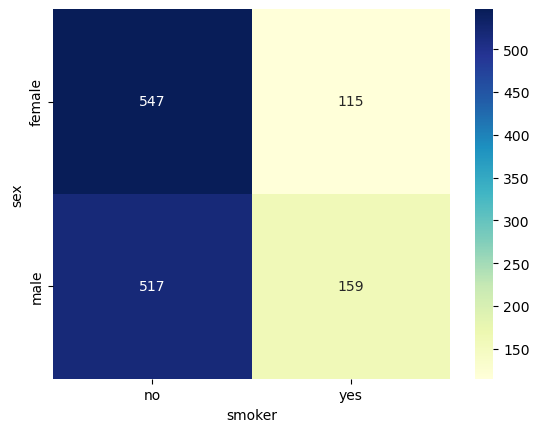

In [84]:
# 열지도 시각화
    # cmap : 색상 조합
    # annot=True : 수치 출력 여부
    # fmt : 수치 출력 형식, 'd' 정수, '.2f' 소수점 둘째자리 소수
sns.heatmap(tab1, cmap='YlGnBu', annot=True, fmt='d')

* 참고: [Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

<br>

*crosstab( )*에서 `margins=True` 옵션을 활용하면 행, 열 합계, 전체 합계 등을 한번에 계산 가능

In [81]:
# crosstab()을 활용한 교차표 생성
tab1m = pd.crosstab(df_ins['sex'], df_ins['smoker'], margins=True)
tab1m

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


<Axes: xlabel='smoker', ylabel='sex'>

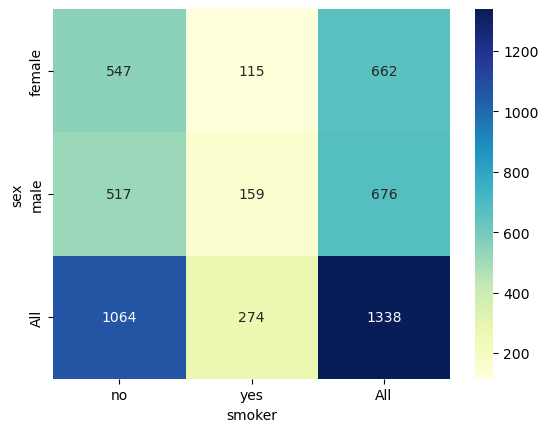

In [83]:
# tab1m을 열지도로 표현하기
sns.heatmap(tab1m, cmap='YlGnBu', annot=True, fmt='d')

<br>

### 3.2. 행백분율과 열백분율의 계산과 열지도 그리기

두 변수의 관계를 제대로 파악하기 위해서는 상대적인 숫자 계산이 필수적  
`normalize=` 옵션을 활용해서 교차표에서 비율 계산 가능

* `normalize='all'`: 전체 중 각 셀 비중
* `normalize='index'`: 행 백분율(행 합계 중 각 셀의 비중)
* `normalize='columns'`: 열 백분율(열 합계 중 각 셀의 비중)


In [88]:
# 전체 백분율
    # normalize : '정규화'
tab1_all = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='all', margins=True)
tab1_all

smoker,no,yes,All
sex,,,
female,0.408819,0.085949,0.494768
male,0.386398,0.118834,0.505232
All,0.795217,0.204783,1.000000


In [86]:
# tab1_all을 열지도로 표현하기
#sns.heatmap(tab1_all, cmap='YlGnBu', annot=True, fmt='.2f')

In [87]:
# 행백분율
    # normalize='index'
tab1_idx = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='index')
tab1_idx

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207


<Axes: xlabel='smoker', ylabel='sex'>

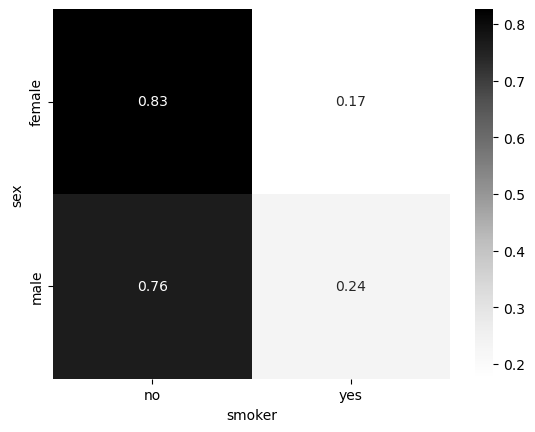

In [89]:
# 행백분율 교차표를 열지도로 표현하기
sns.heatmap(tab1_idx, cmap='Greys', annot=True, fmt='.2f') #cmap = 'YlOrRd'

In [90]:
# 열백분율
    # normalize='index'
tab1_col = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='columns')
tab1_col

smoker,no,yes
sex,,
female,0.514098,0.419708
male,0.485902,0.580292


<Axes: xlabel='smoker', ylabel='sex'>

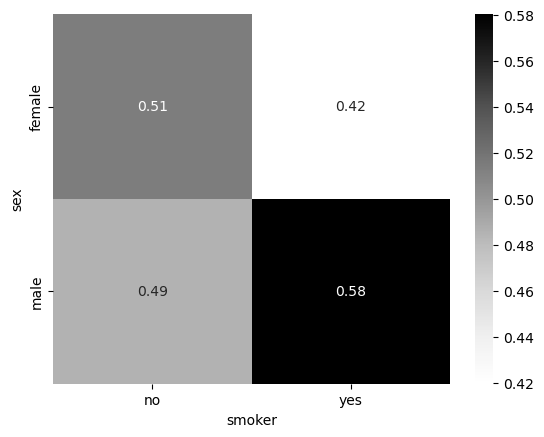

In [93]:
# 열백분율 교차표를 열지도로 표현하기
sns.heatmap(tab1_col, cmap='Greys', annot=True, fmt='.2f')

In [94]:
# 전체 비율을 추가한 열백분율
    # margins=True
tab1_col = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='columns', margins=True)
tab1_col

smoker,no,yes,All
sex,,,
female,0.514098,0.419708,0.494768
male,0.485902,0.580292,0.505232


In [95]:
#sns.heatmap(tab1_col, cmap='YlGnBu', annot=True, fmt='.2f')

#### [실습] 두 범주형 변수의 관계 탐색

1. df_sp에서 'race/ethnicity'와 'parental level of education'의 교차표 만들기
2. 1.의 교차표에 margin 추가하기
3. 2.의 교차표에서 행 백분율, 열 백분율 계산하고 시각화 하기


In [109]:
# df_sp 데이터 확인
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
# 1.df_sp에서 'race/ethnicity'와 'parental level of education'의 교차표 만들기
tab2 = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'])

In [106]:
# 2.1.의 교차표에 margin 추가하기
tab2 = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], margins=True)

<Axes: xlabel='parental level of education', ylabel='race/ethnicity'>

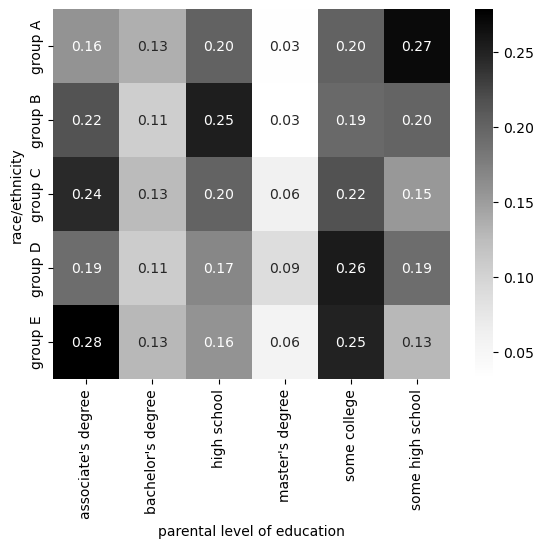

In [108]:
# 3.2.의 교차표에서 행 백분율, 열 백분율 계산하고 시각화 하기
tab2_idx = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], normalize='index')
tab2_idx

sns.heatmap(tab2_idx, cmap='Greys', annot=True, fmt='.2f')

<Axes: xlabel='parental level of education', ylabel='race/ethnicity'>

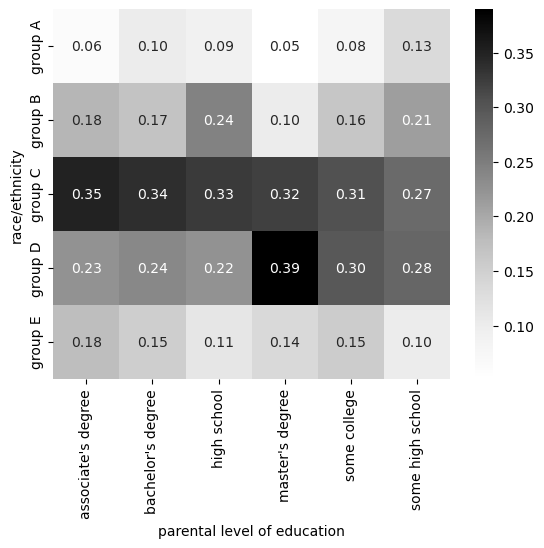

In [107]:
# 3.2.의 교차표에서 행 백분율, 열 백분율 계산하고 시각화 하기
tab2_col = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], normalize='columns')
tab2_col

sns.heatmap(tab2_col, cmap='Greys', annot=True, fmt='.2f')

<br>
<br>
<br>

## 4. 두 수치형 변수의 관계

두 수치형 변수의 관계는 **산점도(scatterplot)**를 그리고 **상관계수(correlation coefficient)**를 계산

In [128]:
# 예제 데이터 불러오기
    # 아빠키와 아들키
df_heights = pd.read_csv('data/heights.csv')
df_heights.head()

,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070


<br>

### 4.1. 산점도 그리기

In [129]:
# 각 변수 평균 계산
mean_f = df_heights['father'].mean()
mean_s = df_heights['son'].mean()
mean_f, mean_s

(171.92522603599258, 174.45753692820037)

<Axes: xlabel='father', ylabel='son'>

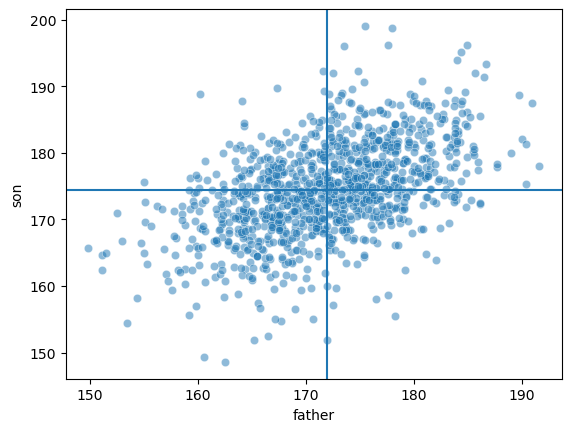

In [134]:
# seaborn으로 산점도 그리기
plot_ = sns.scatterplot(data=df_heights,
                        x='father',
                        y='son',
                        alpha=0.5)
plot_.axhline(mean_s) # 수평선 추가
plot_.axvline(mean_f) # 수직선 추가
plot_

<br>

### 4.2. 공분산과 상관 계수 계산

In [114]:
# 공분산 계산하기
df_heights[['father','son']].cov()

,father,son
father,48.608307,24.989192
son,24.989192,51.113092


In [115]:
# 상관계수 계산하기
df_heights[['father','son']].corr()

,father,son
father,1.000000,0.501338
son,0.501338,1.000000


<br>

#### [실습] 두 수치형 변수의 관계 탐색

1. **df_sp**에서 'math score'와 'reading score'의 산점도를 그리기
2. 1.의 그래프에 두 변수의 평균을 활용해서 수직선, 수평선 추가하기
3. 1.의 두 변수의 상관계수 계산하기
4. **df_ins**에서 'bmi'와 'charges의 산점도'를 그리고 상관계수 계산하기
5. **[같이 실습]** df_ins에서 아래의 명령어를 실행하고 smoker별 분할 데이터로 bmi와 charges의 상관계수를 나눠 계산하기

In [119]:
# df_sp 'math score', 'reading score' 변수 평균 구하기
mean_1 = df_sp['math score'].mean()
mean_2 = df_sp['reading score'].mean()

<Axes: xlabel='math score', ylabel='reading score'>

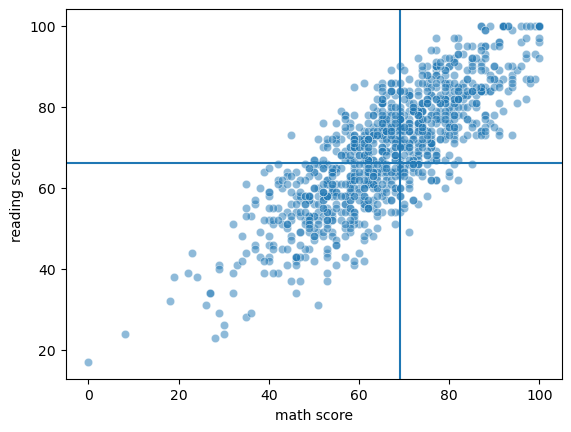

In [135]:
# 1/2. df_sp에서 'math score'와 'reading score'의 산점도를 그리고, 보조선 추가하기
plot_ = sns.scatterplot(data=df_sp,
                        x='math score',
                        y='reading score',
                        alpha=0.5)
plot_.axhline(mean_1) # 수평선 추가
plot_.axvline(mean_2) # 수직선 추가
plot_

In [121]:
# 3.f_sp에서 'math score'와 'reading score' 두 변수의 상관계수 계산하기

df_sp[['math score','reading score']].corr()

,math score,reading score
math score,1.00000,0.81758
reading score,0.81758,1.00000


<Axes: xlabel='bmi', ylabel='charges'>

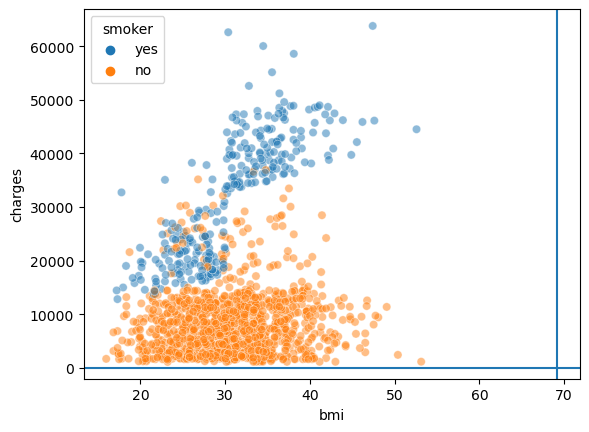

In [149]:
# 4. df_ins에서 'bmi'와 'charges의 산점도'를 그리기
plot_ = sns.scatterplot(data=df_ins,
                        x='bmi',
                        y='charges',
                        alpha=0.5, hue='smoker')
plot_.axhline(mean_1) # 수평선 추가
plot_.axvline(mean_2) # 수직선 추가
plot_

In [124]:
# 4. df_ins에서 'bmi'와 'charges의 상관계수 계산하기
df_ins[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [125]:
# 5. 분할 데이터 생성 - 흡연여부에 따른 관측치 분할
df_ins_smoker = df_ins[df_ins['smoker'] == 'yes']
df_ins_nonsmoker = df_ins[df_ins['smoker'] == 'no']

In [126]:
# 5-1. df_ins_smoker에서 'bmi'와 'charges'의 상관계수 계산하기
df_ins_smoker[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


In [127]:
# 5-2. df_ins_nonsmoker에서 'bmi'와 'charges'의 상관계수 계산하기
df_ins_nonsmoker[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.084037
charges,0.084037,1.000000


<br>
<br>
<br>


## 5. 범주형 변수와 수치형 변수의 관계

범주형 변수를 그룹처럼 활용해서 그룹별 평균을 계산하고, 그룹별 상자그림을 그려서 분포를 비교  
한 변수의 집계에서 `groupby()`를 추가하면 되고, 필요에 따라 `agg()`를 활용 가능

<br>

### 5.1. 그룹별 집계값의 계산

In [136]:
# 한 수치형 변수의 평균 계산
df_ins['charges'].mean()

13270.422265141257

In [137]:
# 그룹별 평균 계산
df_ins.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [138]:
# describe() 함수 사용하여 그룹별 기술 통계량 구하기
df_ins.groupby('sex')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


<br>

### 5.2. 그래프를 활용한 그룹별 분포 비교

**seaborn**의 그래프 함수에서 `hue=`옵션 등을 활용하면 그룹별로 색을 다르게 한 그래프 작성 가능  

<Axes: xlabel='charges', ylabel='Count'>

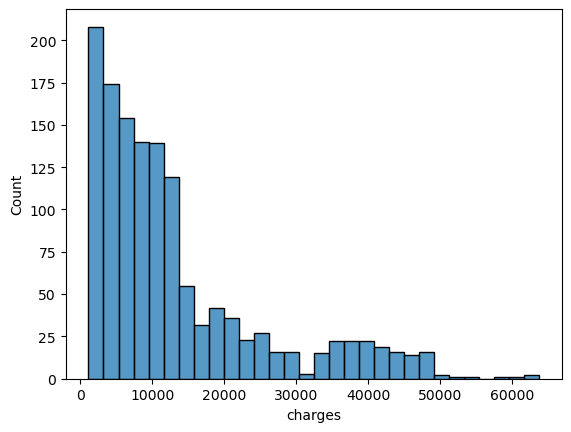

In [139]:
# charges의 히스토그램
sns.histplot(data=df_ins,
             x='charges')

<Axes: xlabel='charges', ylabel='Count'>

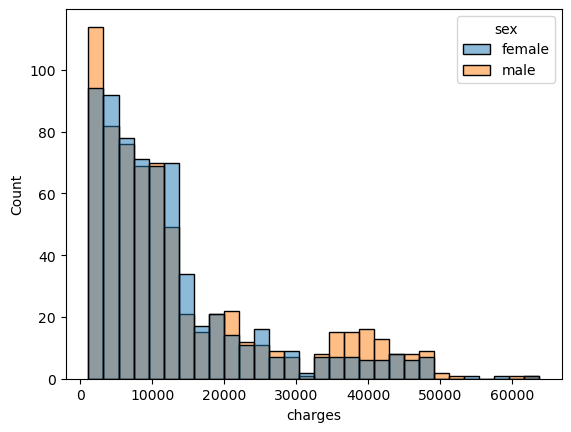

In [140]:
# sex에 따라 색을 다르게 겹쳐그린 히스토그램
sns.histplot(data=df_ins,
             x='charges',
             hue='sex')

<Axes: xlabel='charges', ylabel='Count'>

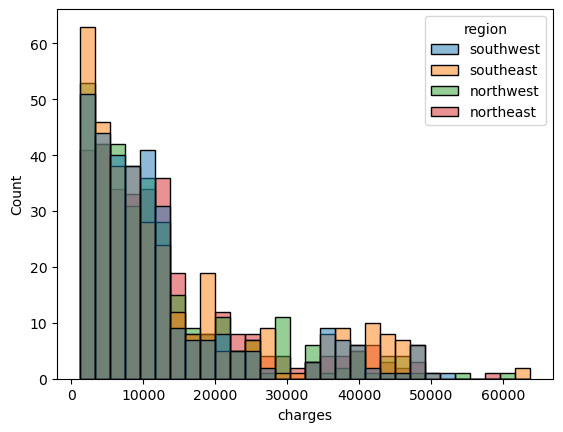

In [141]:
# 많이 겹치기 어려운 히스토그램
sns.histplot(data=df_ins,
             x='charges',
             hue='region')

<Axes: xlabel='sex', ylabel='charges'>

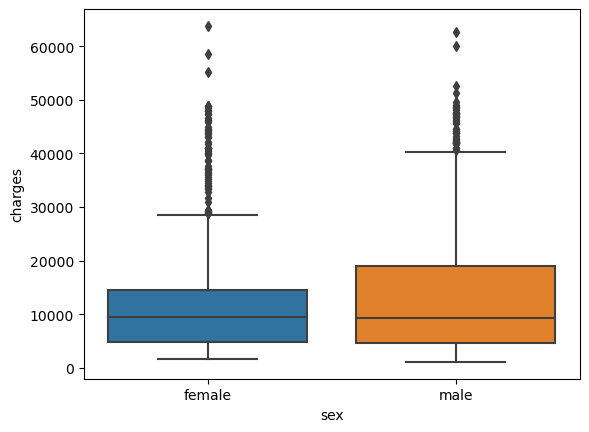

In [142]:
# 그룹별 상자그림의 활용
sns.boxplot(data=df_ins,
            x='sex',
            y='charges')

<Axes: xlabel='region', ylabel='charges'>

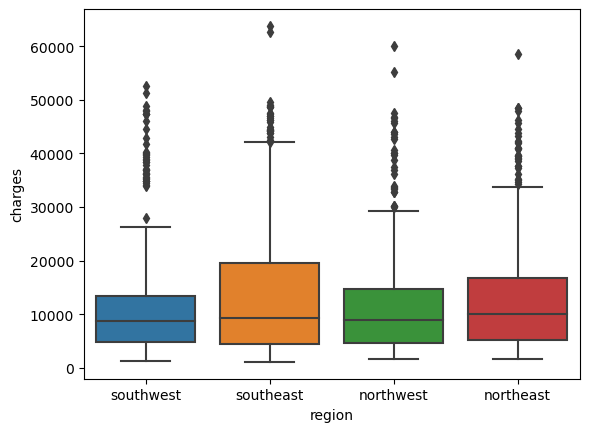

In [143]:
# 더 많은 그룹을 나란하게 그린 상자그림
sns.boxplot(data=df_ins,
            x='region',
            y='charges')

#### [실습] 변수 관계 탐색

1. 데이터 df_sp에서 `gender`별 `math score`의 평균을 계산하기
2. 1의 두 변수를 활용해서 히스토그램과 상자그림 그리기
3. `describe()` 함수를 사용하여 데이터 df_sp에서 `parental level of education`별 `reading score`의 기술 통계량 계산하기
4. 3의 두 변수를 활용해서 히스토그램과 상자그림 그리기



In [150]:
# df_sp 데이터 미리보기
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [153]:
# 1.데이터 df_sp에서 gender별 math score의 평균을 계산하기
df_sp.groupby('gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

<Axes: xlabel='math score', ylabel='Count'>

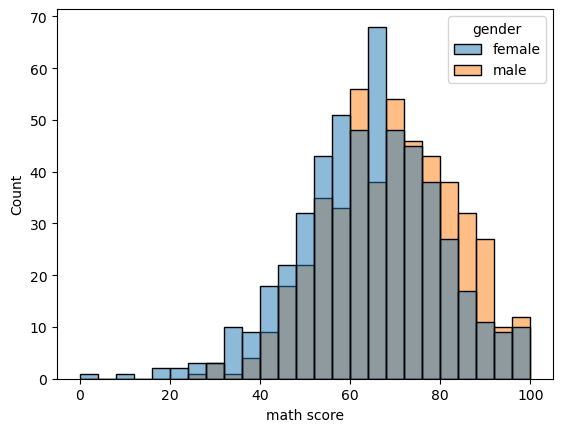

In [154]:
# 2.1의 두 변수를 활용해서 히스토그램 그리기
sns.histplot(data=df_sp,
             x='math score',
             hue='gender')

<Axes: xlabel='gender', ylabel='math score'>

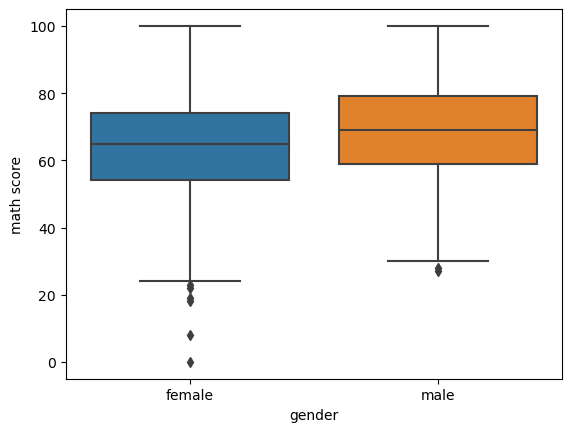

In [155]:
#1의 두 변수를 활용해서 상자그림 그리기
sns.boxplot(data=df_sp,
            x='gender',
            y='math score')

In [156]:
# 3.describe() 함수를 사용하여 데이터 df_sp에서 parental level of education별 reading score의 기술 통계량 계산하기
df_sp.groupby('parental level of education')['reading score'].describe()

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,70.927928,13.868948,31.0,61.0,72.5,81.00,100.0
bachelor's degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
high school,196.0,64.704082,14.132130,24.0,54.0,66.0,74.25,99.0
master's degree,59.0,75.372881,13.775163,42.0,65.5,76.0,84.50,100.0
some college,226.0,69.460177,14.057049,23.0,60.0,70.5,79.75,100.0
some high school,179.0,66.938547,15.479295,17.0,56.5,67.0,79.00,100.0


<Axes: xlabel='reading score', ylabel='Count'>

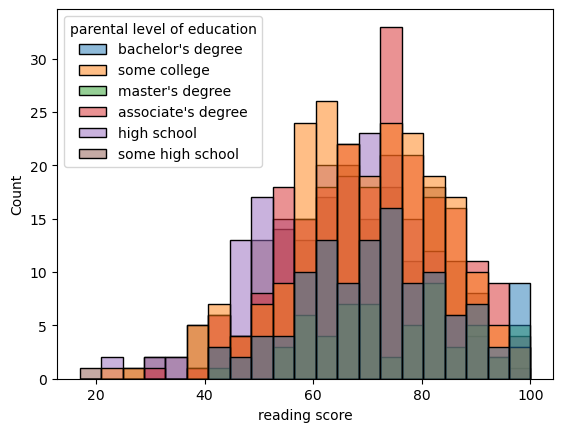

In [161]:
# 4.df_sp에서 parental level of education별 reading score의 히스토그램 그리기
sns.histplot(data=df_sp,
             x='reading score', hue='parental level of education')

<Axes: xlabel='parental level of education', ylabel='reading score'>

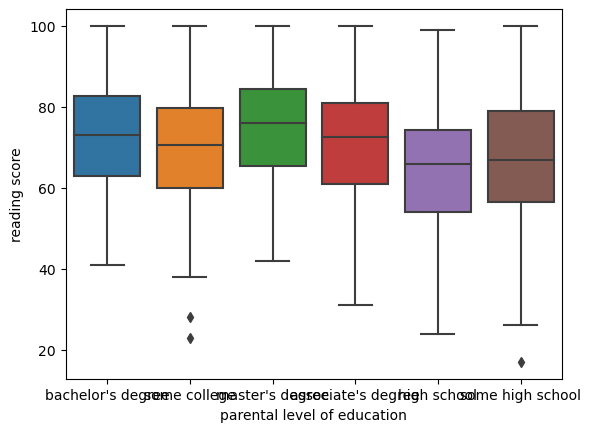

In [163]:
# 4. df_sp에서 parental level of education별 reading score의 상자그림 그리기
sns.boxplot(data=df_sp,
            x='parental level of education',
            y='reading score')

<br>
<br>

## 6. 여러 변수 간 상관관계 분석 및 시각화

`DataFrame.corr()` 메써드를 사용하여 데이터프레임 내의 여러 수치형 변수들 사이의 상관계수를 하나의 행렬로 작성함. 표준화된 값을 갖는 상관 계수 행렬은 열지도로 시각화.

In [164]:
# 여러 변수 간 상관 관계 분석에 사용할 데이터 불러오기
df_genelist = pd.read_csv('./data/z_genelist.csv', index_col = 0)
df_genelist


,WT1,WT2,WT3,WT4,HT1,HT2,HT3,HT4,HM1,HM2,HM3,HM4
HGNC,,,,,,,,,,,,
NPY,0.910498,1.058356,0.792294,1.914503,-1.404341,-0.949744,-0.705210,-1.125658,-0.206826,-0.242391,0.070953,-0.112434
MYL12B,1.722857,1.093324,0.808806,1.352251,-1.305429,-1.067907,-0.511605,-0.485814,-0.061602,-0.400788,-0.882233,-0.261860
RPL35A,0.972316,1.614333,1.079843,1.589840,-0.976179,-0.645989,-0.625601,-0.917751,-0.536825,-0.705180,-0.372874,-0.475933
SHANK2,1.429542,1.128880,0.929395,1.295677,0.203167,0.089150,-0.387690,-0.360574,-1.075254,-1.217744,-1.242196,-0.792353
COX8A,0.711821,1.072104,1.006395,2.026676,-0.667017,-0.970305,-1.127383,-0.638042,-0.232167,-0.784593,-0.651888,0.254400
...,...,...,...,...,...,...,...,...,...,...,...,...
IQCB1,-0.646432,-1.315819,-0.942510,-0.651744,0.136314,1.245990,0.762693,2.079306,-0.082727,0.470008,-0.155372,-0.899708
CLU,1.028550,1.525333,1.221903,0.952031,-1.119660,-0.809168,-0.294739,-0.697959,-0.196089,-1.150013,0.565756,-1.025946
FIS1,0.497380,1.295377,1.191652,1.263681,-0.699074,-1.660275,-1.320732,-0.152658,0.674906,-0.529289,-0.004945,-0.556023


In [165]:
# corr() 메써드 사용해서 상관 계수 행렬 구하고 df_corr_mat에 할당하기
df_corr_mat = df_genelist.corr()
df_corr_mat

,WT1,WT2,WT3,WT4,HT1,HT2,HT3,HT4,HM1,HM2,HM3,HM4
WT1,1.000000,0.774974,0.793328,0.693006,-0.782924,-0.715510,-0.737607,-0.587196,-0.316596,-0.433494,-0.629729,-0.098722
WT2,0.774974,1.000000,0.895671,0.858199,-0.853492,-0.850406,-0.778361,-0.656163,-0.259131,-0.573199,-0.515859,-0.230580
WT3,0.793328,0.895671,1.000000,0.807326,-0.854869,-0.826794,-0.757281,-0.611067,-0.269628,-0.549390,-0.548424,-0.227013
WT4,0.693006,0.858199,0.807326,1.000000,-0.787738,-0.813256,-0.813434,-0.646848,-0.087163,-0.590616,-0.534792,-0.215374
HT1,-0.782924,-0.853492,-0.854869,-0.787738,1.000000,0.812655,0.771323,0.594789,0.117742,0.377531,0.453558,0.050204
HT2,-0.715510,-0.850406,-0.826794,-0.813256,0.812655,1.000000,0.741860,0.573155,-0.005175,0.467496,0.392085,0.093509
HT3,-0.737607,-0.778361,-0.757281,-0.813434,0.771323,0.741860,1.000000,0.635229,0.038307,0.335753,0.436459,-0.065257
HT4,-0.587196,-0.656163,-0.611067,-0.646848,0.594789,0.573155,0.635229,1.000000,0.124167,0.215382,0.257120,-0.182582
HM1,-0.316596,-0.259131,-0.269628,-0.087163,0.117742,-0.005175,0.038307,0.124167,1.000000,0.119736,0.202580,0.037977
HM2,-0.433494,-0.573199,-0.549390,-0.590616,0.377531,0.467496,0.335753,0.215382,0.119736,1.000000,0.405978,0.243162


<Axes: >

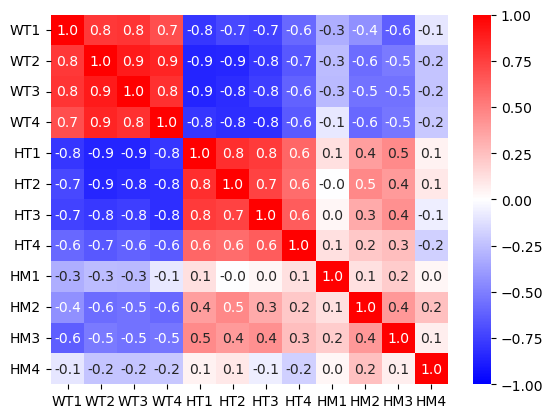

In [166]:
# df_corr_mat을 열지도로 시각화하기
    # camp='bwr' 차가운 온도는 파란색, 뜨거운 온도는 빨간색, 중간 온도는 흰색으로 나타냄
    # annot=True 상관 계수 표시
    # fmt='.1f' 상관 계수 소수점 첫째자리까지 표시
    # vmax=1.0 colormap의 최대값을 1.0으로 고정
    # vmin=-1.0 colormap의 최소값을 -1.0으로 고정
sns.heatmap(df_corr_mat,
            cmap='bwr',
            annot=True,
            fmt='.1f',
            vmax=1.0,
            vmin=-1.0)

#### [실습] 상관 계수 행렬 및 열지도 작성

1. 데이터 df_sp에서 `reading score`, `math score`, `writing score`의 상관 계수 행렬을 구해 df_corr_mat2로 저장하기
2. df_corr_mat2를 열지도로 시각화하기

<Axes: >

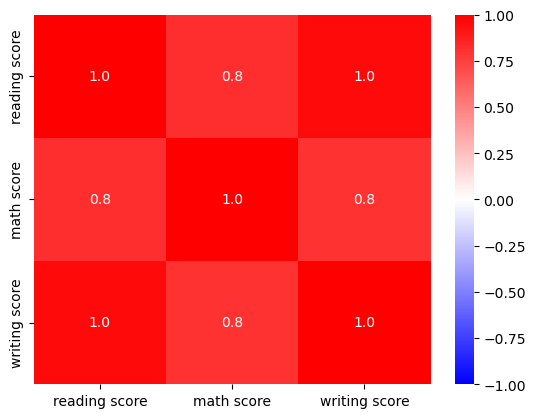

In [190]:
# 1.데이터 df_sp에서 `reading score`, `math score`, `writing score`의 상관 계수 행렬을 구해 df_corr_mat2로 저장하기
# pandas 다중 변수 선택 문법 사용
df_corr_mat2=df_sp[['reading score', 'math score','writing score']].corr()
sns.heatmap(df_corr_mat2,
            cmap='bwr',
            annot=True,
            fmt='.1f',
            vmax=1.0,
            vmin=-1.0)


<Axes: >

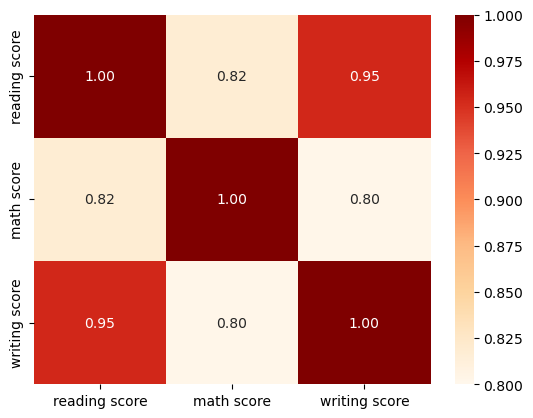

In [191]:
# 2.df_corr_mat2를 열지도로 시각화하기
    # 상관 계수 소수점 두자리까지 표시,
    # colormap은 OrRd 사용,
    # vmax = 1.0,
    # vmin = 0.8 입력
sns.heatmap(df_corr_mat2,
            cmap='OrRd',
            annot=True,
            fmt='.2f',
            vmax=1.0,
            vmin=0.8)

<br>
<br>
<br>
<br>

#### (참고) 피벗 테이블 활용

In [ ]:
# pivot_table()을 활용한 피벗 테이블 생성
    ## index  : 행 그룹변수
    ## columns: 열 그룹변수
    ## values : 값 변수
    ## aggfunc: 집계 함수, 'mean'은 default
agg = df_ins.pivot_table(index='sex', columns='region', values='charges') #, aggfunc='size)
agg

In [ ]:
# seaborn을 활용한 시각화
sns.heatmap(agg, cmap='YlGnBu', annot=True, fmt='.0f')

#### End of script